
# About The Company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are
geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to
any other station in the system anytime.<br> <br>
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One
2
approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and
annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who
purchase annual memberships are Cyclistic members. <br><br>


____
<div id="top"></div>


# Table Of Contents

- [Ask](#ask)
- [Prepare](#prep)
- [Process](#prepare)
- [Data Overview](#overview)
- [Monthly Breakdowns](#monthbreakdown)
- [Recomendations](#share)

____
<div id='ask'></div>

# Ask

Cyclistic want to increase the number of annual members as they are more profitable than casual riders. The marketing director believes that maximizing the number of annual members is the key to growth. To do this the marketing team wants to increase the number of annual members by converting casual users instead of targeting all new customers. To do this the marketing team needs to understand how annual members and casual users use Cyclistic’s services.

____
<div id = 'prep'></div>

# Prepare
Since Cyclistic is a fictional company the data was taken from Motivate International Inc. (The data is [here](https://divvy-tripdata.s3.amazonaws.com/index.html) ). This case study will be lookaing at the data for January to September, there is a file for each month. These monthly files have been merged together and exported in another notebook. Each file has data for the ride id, the time the ride
starts and ends, the location data for each ride, and if the user was a member or a casual user. Due to Privacy laws this data set will not be able tell if casual users live in Cyclistic’s service
area or if they are repeat users of Cyclistic’s services.

____

<div id="prepare"></div>

# Process
this section the data is going to be cleaned and manulated in order to analyze and visualize the data.

[Top of Page](#top)

### Index

- [Set Up](#setup)
- [Value Check](#check)
- [New Columns](#ncol)
- [Filtering the Data](#frames)
- [Data Exploration](#explore)

____
<div id="setup"></div>

# Set Up
This section is where the python environment is set up and data is imported and some global variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#seaborn styling
sns.set_palette('coolwarm')
%matplotlib inline

#changing the way that pandas displays floats
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Dictionaries to change the names of the values in a column.

In [3]:
ridetype = {'rideable_type':{'electric_bike':'Electric Bike','classic_bike':'Classic Bike', 'docked_bike':'Docked Bike'}}
membership = {'member_casual':{'member':'Member','casual':'Casual'}}

Importing The Data

In [4]:
dfcyc = pd.read_csv(r'G:\Pictures\Misc\Data Analytics\Course 8 Capstone\Case 1\Python Stuff\Cyclistic Data.csv')

In [5]:
dfcyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596173 entries, 0 to 4596172
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 455.9+ MB


In [6]:
dfcyc.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.92,-87.65,41.93,-87.64,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.80,-87.59,41.81,-87.60,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.01,-87.69,42.04,-87.70,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.80,-87.59,41.81,-87.60,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.80,-87.59,41.81,-87.60,member


___
<div id="check"></div>

## Value Check


Here the values of the columns will be checked to make sure they are correct data types and that they have the correct values.

[Back to Process](#prepare)

Checking the unique values of the rideable_type column and the member_casual column.

In [7]:
dfcyc['rideable_type'].unique()

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

In [8]:
dfcyc['member_casual'].unique()

array(['member', 'casual'], dtype=object)

In [9]:
dfcyc['rideable_type'].value_counts()

electric_bike    2370979
classic_bike     2146907
docked_bike        78287
Name: rideable_type, dtype: int64

In [10]:
dfcyc.groupby(by=['member_casual','rideable_type']).count()['ride_id'].unstack()

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,730702.00,78287.00,923055.00
member,1416205.00,NaN,1447924.00


Members don't use docked bikes and the use of them is very low so i will filter them out of the data.

In [11]:
dfcyc = dfcyc[dfcyc['rideable_type'] != 'docked_bike']
dfcyc['rideable_type'].unique()

array(['electric_bike', 'classic_bike'], dtype=object)

Categorizing the rideable type column so they are also returned in the same order.

In [12]:
#categorizing the rideable type column so it is returned in the same order
dfcyc['rideable_type'] = pd.Categorical(dfcyc['rideable_type'], 
                                        categories = ['electric_bike', 'classic_bike'], ordered = True)


Changing the data type of the started_at and ended_at columns to a datetime data type.

In [13]:
dfcyc['started_at'] = pd.to_datetime(dfcyc['started_at'])
dfcyc['ended_at'] = pd.to_datetime(dfcyc['ended_at'])

In [14]:
dfcyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4517886 entries, 0 to 4596172
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: category(1), datetime64[ns](2), float64(4), object(6)
memory usage: 452.4+ MB


____
<div id="ncol"></div>

## New Columns

Here new columns will be created and then orginized. The following columns will be created: <br>

- ride_duration_sec: the time the ride lasted for, in seconds.
- day_of_week: The day of the week that the ride started, Sunday -> Saturday.
- start_hour: The hour of the day the ride started, 0(midnight) -> 23 (11pm).
- start_month: The month the ride was taken, January -> September.
- start_date: The date the ride started, YYYY-MM-DD.

[Back to Process](#prepare)

Making a new column for ride duration.

In [15]:
# makeing the column for ride duration
dfcyc['ride_duration_sec'] = (dfcyc['ended_at'] - dfcyc['started_at']).dt.total_seconds()


In [16]:
dfcyc['ride_duration_sec']

0          651.00
1          509.00
2          794.00
3          526.00
4          919.00
            ...  
4596168    668.00
4596169    545.00
4596170   1012.00
4596171    157.00
4596172    207.00
Name: ride_duration_sec, Length: 4517886, dtype: float64

In [17]:
dfcyc['ride_duration_sec'].describe()

count   4517886.00
mean        972.96
std        3068.17
min       -4901.00
25%         331.00
50%         583.00
75%        1031.00
max       93596.00
Name: ride_duration_sec, dtype: float64

Cleaning out the rows where the ride duration is less then 30 sec.

In [18]:
dfcyc = dfcyc[dfcyc['ride_duration_sec'] > 30]

Making new columns for day of the week, the hour the ride started, the date the ride started, and the month the ride started.

In [19]:
#making a column for day of the week
dfcyc['day_of_week'] = dfcyc['started_at'].apply(lambda row: row.day_name())

In [20]:
#a column for the hour of the day the ride started 
dfcyc['start_hour'] = dfcyc['started_at'].apply(lambda row: row.hour)

____

In [21]:
#a new column for the month the ride started
dfcyc['start_month'] = dfcyc['started_at'].apply(lambda row: row.month)

In [22]:
# a new column for the date the ride started
dfcyc['start_date'] = dfcyc['started_at'].apply(lambda x: x.date())

Changing the start_month values to the month names.

In [23]:
dfcyc['start_month'] = dfcyc['start_month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',
                                                 6:'June',7:'July',8:'August',9:'September'})

In [24]:
dfcyc['ride_duration_sec']

0          651.00
1          509.00
2          794.00
3          526.00
4          919.00
            ...  
4596168    668.00
4596169    545.00
4596170   1012.00
4596171    157.00
4596172    207.00
Name: ride_duration_sec, Length: 4435149, dtype: float64

Categorizing start_months so they are returned in chronological order.

In [25]:
dfcyc['start_month'] = pd.Categorical(dfcyc['start_month'], categories = ['January', 'February', 'March', 'April', 
                                                                          'May', 'June','July', 'August', 'September'],
                                      ordered = True)

categorizing day of the week Sunday -> Saturday.

In [26]:
dfcyc['day_of_week'] = pd.Categorical(dfcyc['day_of_week'], categories = ['Sunday','Monday','Tuesday','Wednesday',
                                                                          'Thursday','Friday','Saturday'],
                                      ordered = True)

categorizing start hour.

In [27]:
dfcyc['start_hour'] = pd.Categorical(dfcyc['start_hour'], categories = range(0,24), ordered = True)

Checking to see if the new columns work as desired.

In [28]:
dfcyc['start_date']

0          2023-01-21
1          2023-01-10
2          2023-01-02
3          2023-01-22
4          2023-01-12
              ...    
4596168    2023-09-03
4596169    2023-09-09
4596170    2023-09-15
4596171    2023-09-15
4596172    2023-09-09
Name: start_date, Length: 4435149, dtype: object

In [29]:
dfcyc['start_month'].unique()

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']
Categories (9, object): ['January' < 'February' < 'March' < 'April' ... 'June' < 'July' < 'August' < 'September']

In [30]:
dfcyc['start_hour'].unique()

[20, 15, 7, 10, 13, ..., 2, 1, 5, 23, 3]
Length: 24
Categories (24, int64): [0 < 1 < 2 < 3 ... 20 < 21 < 22 < 23]

In [31]:
dfcyc['start_date']

0          2023-01-21
1          2023-01-10
2          2023-01-02
3          2023-01-22
4          2023-01-12
              ...    
4596168    2023-09-03
4596169    2023-09-09
4596170    2023-09-15
4596171    2023-09-15
4596172    2023-09-09
Name: start_date, Length: 4435149, dtype: object

In [32]:
dfcyc['start_month'].unique()

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']
Categories (9, object): ['January' < 'February' < 'March' < 'April' ... 'June' < 'July' < 'August' < 'September']

In [33]:
dfcyc['start_month'].unique()

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']
Categories (9, object): ['January' < 'February' < 'March' < 'April' ... 'June' < 'July' < 'August' < 'September']

In [34]:
dfcyc['day_of_week'].unique()

['Saturday', 'Tuesday', 'Monday', 'Sunday', 'Thursday', 'Wednesday', 'Friday']
Categories (7, object): ['Sunday' < 'Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday']

In [35]:
dfcyc['start_month'].unique()

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']
Categories (9, object): ['January' < 'February' < 'March' < 'April' ... 'June' < 'July' < 'August' < 'September']

In [36]:
dfcyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4435149 entries, 0 to 4596172
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_duration_sec   float64       
 14  day_of_week         category      
 15  start_hour          category      
 16  start_month         category      
 17  start_date          object        
dtypes: category(4), datetime64[ns](2), float64(5), object(7)
memory usage: 524.5+ MB


____
<div id="frames"></div>

## Filtering The Data

Here new data frames are created. The first frame will be one with the columns that will be used. Two new frames for only casual users and one for members. and then frames for the months April to August for casual users to help further breakdown their behavior.

[Back to Process](#prepare)

____
Making a secound data frame so i don't have to load unwanted columns every time i call it.

In [37]:
df = dfcyc[['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'member_casual','ride_duration_sec', 'day_of_week', 'start_hour',
       'start_month','start_date']]

In [38]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_duration_sec,day_of_week,start_hour,start_month,start_date
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member,651.00,Saturday,20,January,2023-01-21
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,member,509.00,Tuesday,15,January,2023-01-10
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,casual,794.00,Monday,7,January,2023-01-02
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,member,526.00,Sunday,10,January,2023-01-22
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,member,919.00,Thursday,13,January,2023-01-12


Making two data frames that will filter the data by membership type.

In [39]:
dfmem = df[df['member_casual'] == 'member'].copy()
dfcas = df[df['member_casual'] == 'casual']

For further breakdown of the data monthly data will be broken down into seperate data frames.

In [40]:
april = dfcas[dfcas['start_month'] == 'April']
may = dfcas[dfcas['start_month'] == 'May']
june = dfcas[dfcas['start_month'] == 'June']
july = dfcas[dfcas['start_month'] == 'July']
august = dfcas[dfcas['start_month'] == 'August']

____
<div id = 'explore'></div>

## Data Exploration

Just a quick look at some of the data.

[Back to Process](#prepare)

The total amount of uses by casual users and members.

In [41]:
df.groupby(by=['member_casual']).count()['ride_id']

member_casual
casual    1624949
member    2810200
Name: ride_id, dtype: int64

A further breakdown into what bikes the casual users and members use.

In [42]:
df.groupby(by=['member_casual','rideable_type']).count()['ride_id']

member_casual  rideable_type
casual         electric_bike     900334
               classic_bike      724615
member         electric_bike    1409244
               classic_bike     1400956
Name: ride_id, dtype: int64

The monthly bike uses for casual users and members.

In [43]:
df.groupby(by=['member_casual','rideable_type','start_month']).count()['ride_id'].unstack()


start_month                  January  February   March   April     May  \
member_casual rideable_type                                              
casual        electric_bike    23693     24585   38572   86838  125040   
              classic_bike     13811     15435   19311   48455   91767   
member        electric_bike    71182     70366  104531  152565  187674   
              classic_bike     75602     73622   86829  119542  175410   

start_month                    June    July  August  September  
member_casual rideable_type                                     
casual        electric_bike  165602  166057  143263     126684  
              classic_bike   115508  141632  147447     131249  
member        electric_bike  216670  212139  207730     186387  
              classic_bike   194613  216730  245713     212895

A quick breakdown of how long casual users and members ride the bikes

In [44]:
df[df['member_casual'] == 'member']['ride_duration_sec'].describe()

count   2810200.00
mean        777.91
std        1977.61
min          31.00
25%         312.00
50%         533.00
75%         910.00
max       93580.00
Name: ride_duration_sec, dtype: float64

In [45]:
df[df['member_casual'] == 'casual']['ride_duration_sec'].describe()

count   1624949.00
mean       1359.11
std        4375.79
min          31.00
25%         416.00
50%         727.00
75%        1327.00
max       93596.00
Name: ride_duration_sec, dtype: float64

____
<div id="overview"></div>

# Data Overview
This section will show a broad overview of how casual users and members use Cyclistic bikes. <br>

- [Monthly](#monthly)
- [Weekly](#weekly)
- [Daily](#daily)

- [Top of Page](#top)

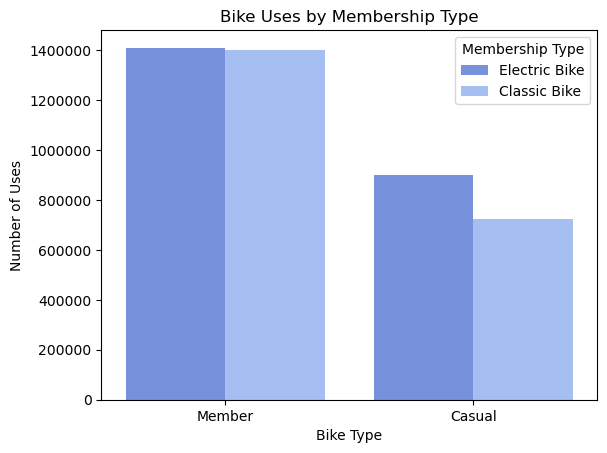

In [46]:
sns.countplot(data=df.replace(ridetype),x='member_casual',
              hue='rideable_type')
plt.title('Bike Uses by Membership Type')
plt.xlabel('Bike Type')
plt.ylabel('Number of Uses')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.legend(title = 'Membership Type')
plt.gca().set_xticklabels(['Member','Casual'])
plt.show()

Members use electric bikes and classic bikes at about the same numbers. Casual users prefer to use the electric bike over the classic bike. members do not use the docked bikes and the casual users have 78 287 uses.

____
<div id = 'monthly'></div>

## Monthly Uses Breakdown

[Back to Overview](#overview)

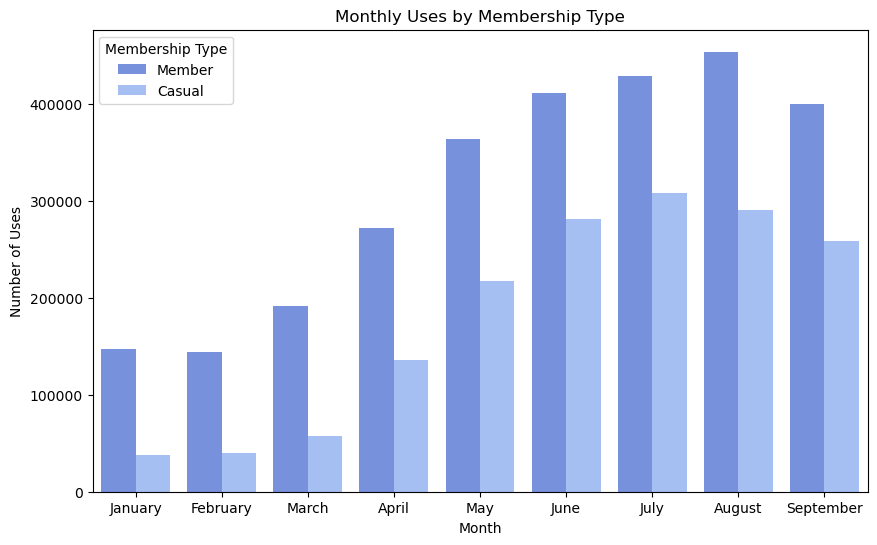

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(data = df.replace(membership),
              x = 'start_month',hue = 'member_casual')
plt.title('Monthly Uses by Membership Type')
plt.xlabel('Month')
plt.ylabel('Number of Uses')
plt.legend(title = 'Membership Type')
plt.show()

The chart above shows that when the weather gets warmer the more bikes are used. Casual uses start increasing in April and peak in July. Member use follows the same trend but peaks in August.
____

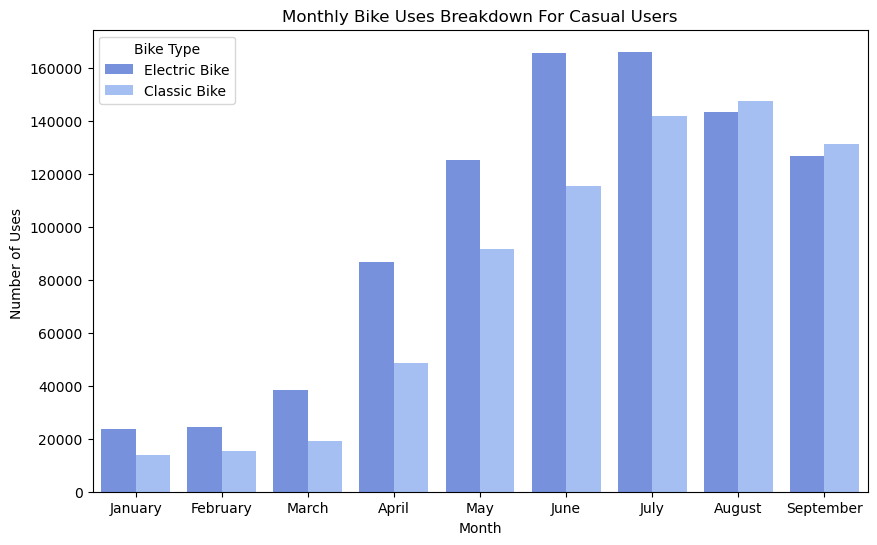

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(data = dfcas.replace(ridetype),
              x = 'start_month',hue = 'rideable_type')
plt.title('Monthly bike uses breakdown for casual users'.title())
plt.xlabel('Month')
plt.ylabel('Number of Uses ')
plt.legend(title = 'Bike Type')
plt.show()

When yearly casual use is broken down by month the electric bikes are the most popular bike used until August. Electric bike use drastically increases in April until its use peaks in June and July and then decreases from there on. Classic Bikes have the same trend of use increasing in April but usage peaks in August and starts to decrease in September.

____

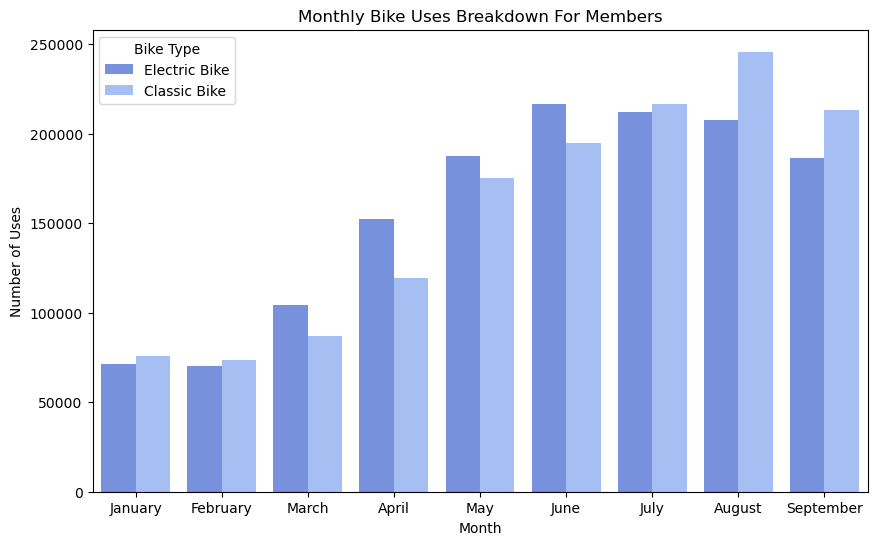

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(data = dfmem.replace(ridetype),
              x = 'start_month',hue = 'rideable_type')
plt.title('monthly bike uses breakdown for members'.title())
plt.xlabel('Month')
plt.ylabel('Number of Uses')
plt.legend(title = 'Bike Type')
plt.show()

When yearly member usage is broken down by month, electric bikes are more popular in the spring and classic bikes are more popular in the summer. Usage for both types start to increase in the spring and peak June to August.
____

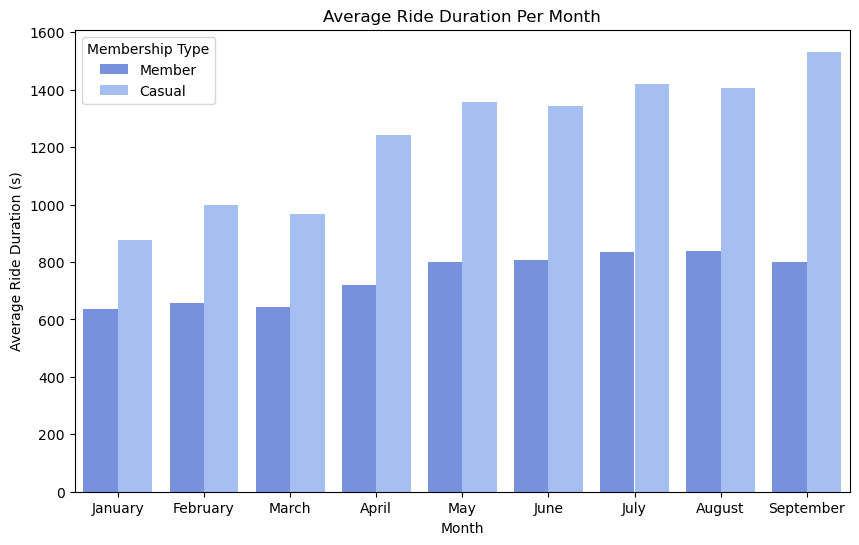

In [50]:
data = df.groupby(by = ['start_month','member_casual']).mean(numeric_only = True)['ride_duration_sec'].to_frame().reset_index()
data['member_casual'] = pd.Categorical(data['member_casual'], categories = ['member','casual'], ordered = True)

plt.figure(figsize=(10,6))
sns.barplot(data = data.replace(membership), 
            x = 'start_month', y = 'ride_duration_sec',hue = 'member_casual')
plt.title('average ride duration per month'.title())
plt.xlabel('Month')
plt.ylabel('Average Ride Duration (s)')
plt.legend(title = 'Membership Type')
plt.show()

Casual users use the bikes for longer on average for every month. the average ride time for casual users peaks in August. The average ride time for members slighty increases in the warmer months.
____

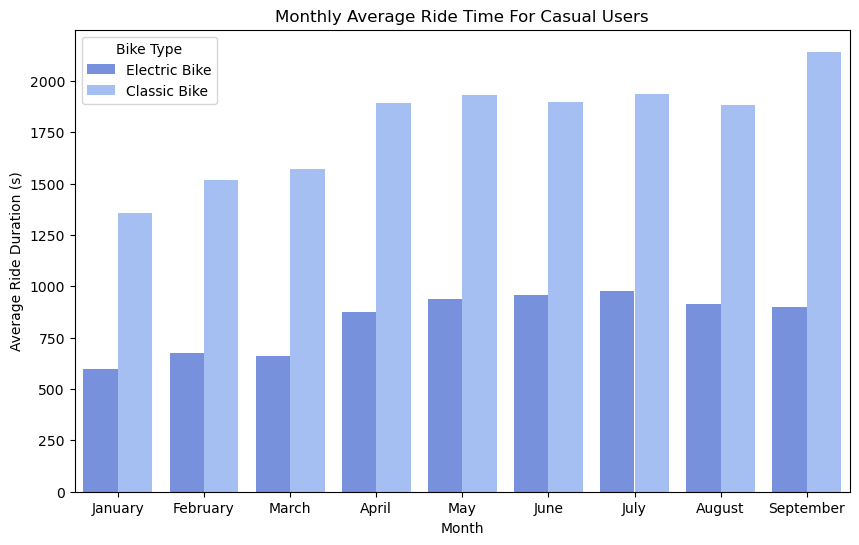

In [51]:
data = df.groupby(by = ['start_month','member_casual','rideable_type']).mean(numeric_only = True)['ride_duration_sec']
data = data.to_frame().reset_index()
data['member_casual'] = pd.Categorical(data['member_casual'], categories = ['member','casual'], ordered = True)
plt.figure(figsize=(10,6))
sns.barplot(data = data[(data['member_casual'] == 'casual')
                       & (data['rideable_type'] != 'docked_bike')].replace(ridetype), 
            x = 'start_month', 
            y = 'ride_duration_sec',hue = 'rideable_type')

plt.title('monthly average ride time for casual users'.title())
plt.xlabel('Month')
plt.ylabel('Average Ride Duration (s)')
plt.legend(title = 'Bike Type')
plt.show()


Casual users spend more time on average on classic bikes then electric bikes. Electric bike average usage time starts to increase in april until July then the average ride time starts to decrease. Classic bikes average ride time increase until April and remains around the same until September when it increases.
____

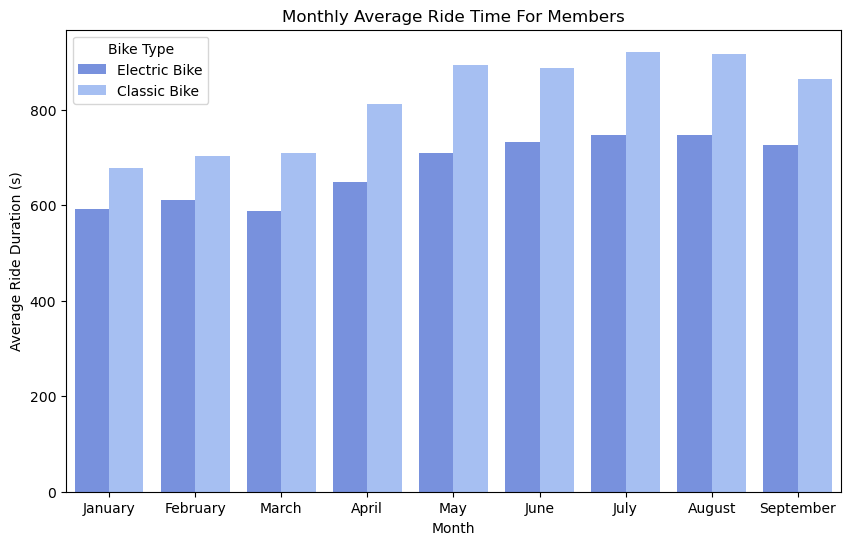

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(data = data[(data['member_casual'] == 'member')
                       & (data['rideable_type'] != 'docked_bike')].replace(ridetype),
            x = 'start_month', 
            y = 'ride_duration_sec',hue = 'rideable_type')
plt.title('monthly average ride time for members'.title())
plt.xlabel('Month')
plt.ylabel('Average Ride Duration (s)')
plt.legend(title = 'Bike Type')
plt.show()

Members also spend more time on classic bikes then the electric bikes. Classic bike average ride time increases until May and then remains at the same level until it starts to drop in September. Electic bike average ride time starts to increase in April then it stabalizes in June and remains at about that level for the rest of the months.
____
<div id = 'weekly'></div>

## Weekly Uses Breakdown

[Back to Overview](#overview)


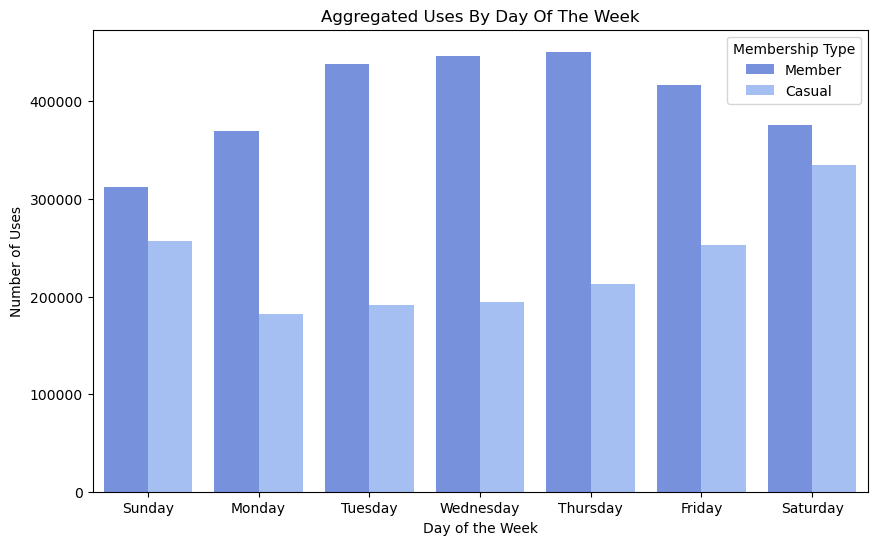

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(data = df.replace(membership),
              x = 'day_of_week',hue = 'member_casual')
plt.title('Aggregated uses by day of the week'.title())
plt.xlabel('Day of the Week')
plt.ylabel('Number of Uses')
plt.legend(title = 'Membership Type')
plt.show()

Members prefer to use bikes in the middle of the week while casual users prefer fridat and the weekend.
___

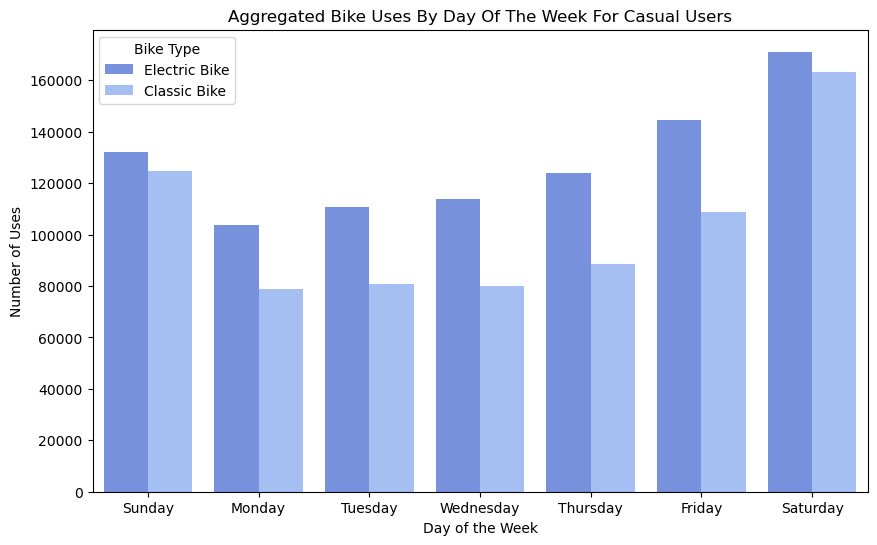

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(data = dfcas.replace(ridetype),x = 'day_of_week',hue = 'rideable_type')
plt.title('Aggregated bike uses by day of the week for casual users'.title())
plt.xlabel('Day of the Week')
plt.ylabel('Number of Uses')
plt.legend(title = 'Bike Type')
plt.show()

Casual users that use electric bikes have a intresting trend of increasing usage, starting from monday, until it peaks saturday. Classic bike usage remains at its low and then starts to increase thursday until it peaks on saturday and starts to do down until monday.
____

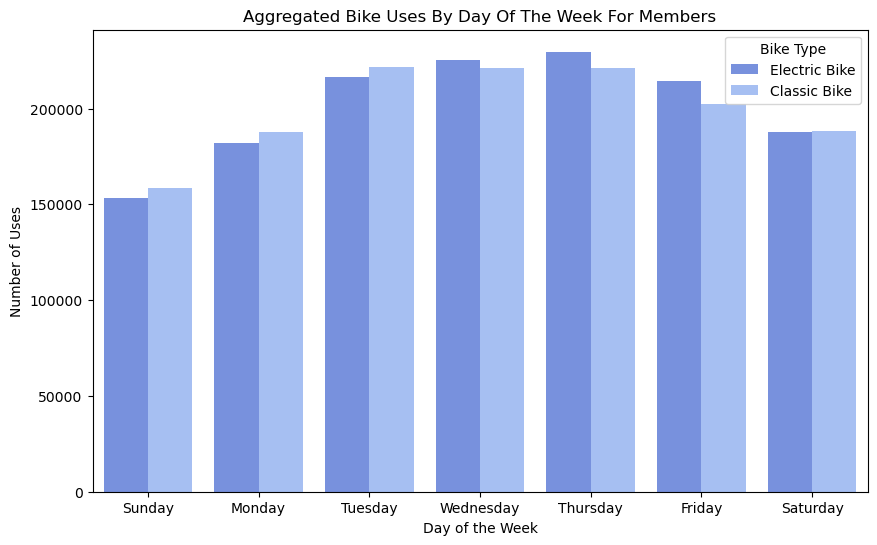

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(data = dfmem.replace(ridetype),x = 'day_of_week',hue = 'rideable_type')
plt.title('Aggregated bike uses by day of the week for members'.title())
plt.xlabel('Day of the Week')
plt.ylabel('Number of Uses')
plt.legend(title = 'Bike Type')
plt.show()

member usage of electirc and classic bikes follow the same trend: starting sunday until it peaks tuesday, remains at the same level until it starts to decrease friday.
___
<div id = 'dayly'></div>

## Daily Breakdown

[Back to Overview](#overview)



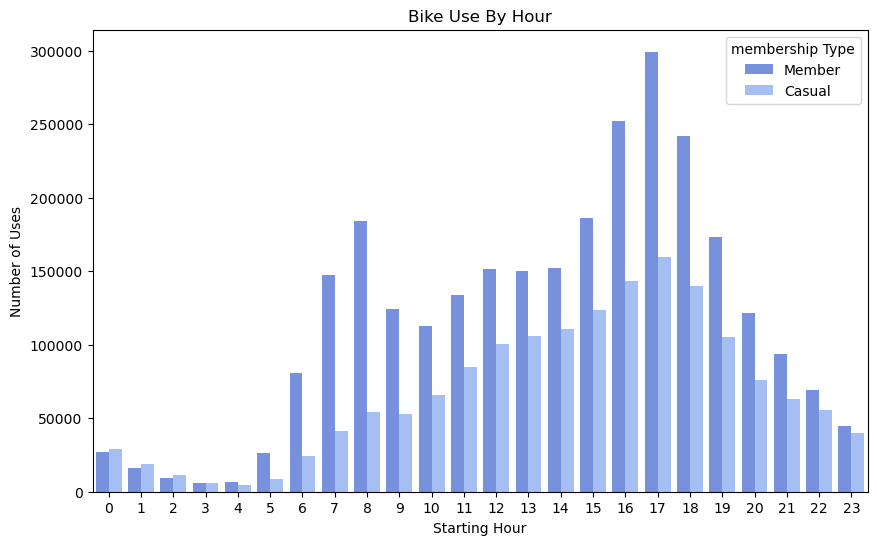

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(data = df.replace(membership), x = 'start_hour', hue = 'member_casual')
plt.title('bike use by hour'.title())
plt.xlabel('Starting Hour')
plt.ylabel('Number of Uses')
plt.legend(title = 'membership Type')
plt.show()

Memebers see a relative rise in usage at 7am to 9am, around the beginning of the work day and then a another spike in usage at 4pm to 6pm, at the end of the work day. Casual users on the other hand do not have that initial spike in usage at the beginning of the day but do have their peak usage at the end of the day, at 5pm.
____

In [57]:
dfcyc['start_date']

0          2023-01-21
1          2023-01-10
2          2023-01-02
3          2023-01-22
4          2023-01-12
              ...    
4596168    2023-09-03
4596169    2023-09-09
4596170    2023-09-15
4596171    2023-09-15
4596172    2023-09-09
Name: start_date, Length: 4435149, dtype: object

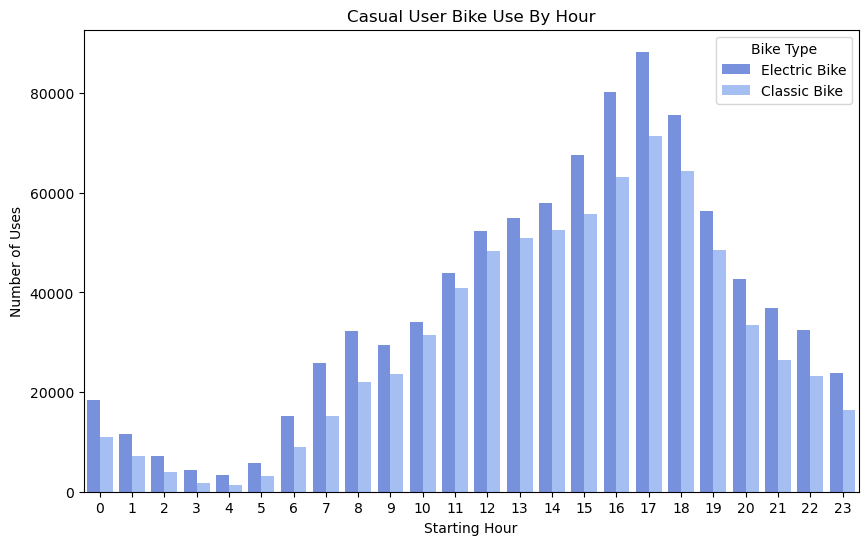

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(data = dfcas.replace(ridetype), x = 'start_hour', hue = 'rideable_type')
plt.title('casual user bike use by hour'.title())
plt.xlabel('Starting Hour')
plt.ylabel('Number of Uses')
plt.legend(title = 'Bike Type')
plt.show()

Casual electic bike uses have a relative spike at 8am and then starts to increase until 5pm and then usage decreases. Classic bikes don't have that morning spike but their usage does increase until the end of the work day, 5pm, and then starts to decrease.
____

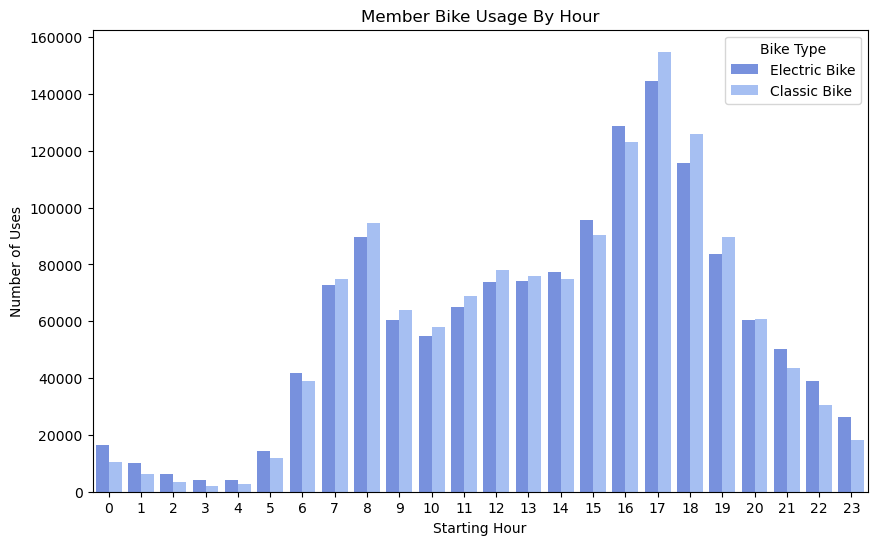

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(data = dfmem.replace(ridetype), x = 'start_hour', hue = 'rideable_type')
plt.title('member bike usage by hour'.title())
plt.xlabel('Starting Hour')
plt.ylabel('Number of Uses')
plt.legend(title = 'Bike Type')
plt.show()

Members have the same trend for both classic and electric bikes; they have a spike at the beginning of the work day and then another bigger spike at the end of the work day.
____
<div id="monthbreakdown"></div>

# Monthly Breakdowns


[Top of Page](#top) <br>

### Index
- [April](#april) <br>
- [May](#may) <br>
- [June](#june) <br>
- [July](#July) <br>
- [August](#august) <br>


To help make a marketing stragity to convert casual users to members the trends of casual members will be further looked into. Since June, July, and August are the most popular months the daily and hourly trends by those months will be looked at.

____
<div id="april"></div>

## Casual Uses for April

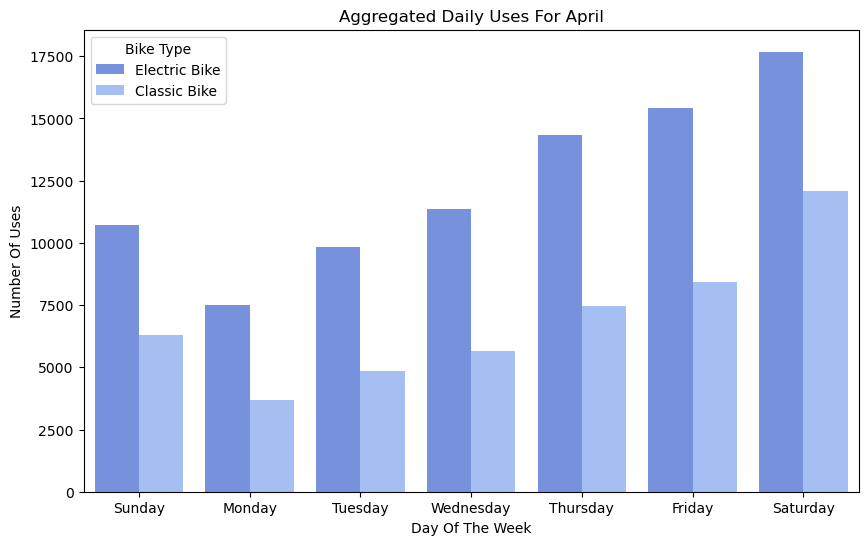

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(data = april.replace(ridetype), x = 'day_of_week', hue = 'rideable_type')
plt.xlabel('day of the week'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated daily uses for april'.title())
plt.show()

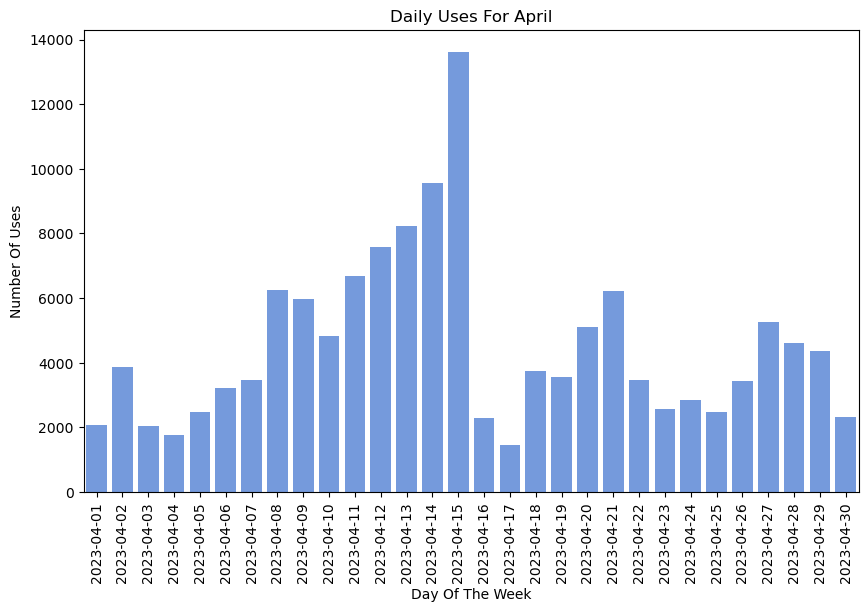

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(data = april.sort_values('start_date') , x = 'start_date', color = 'cornflowerblue')
plt.xlabel('day of the week'.title())
plt.xticks(rotation = 90)
plt.ylabel('Number of uses'.title())
plt.title('daily uses for april'.title())
plt.show()

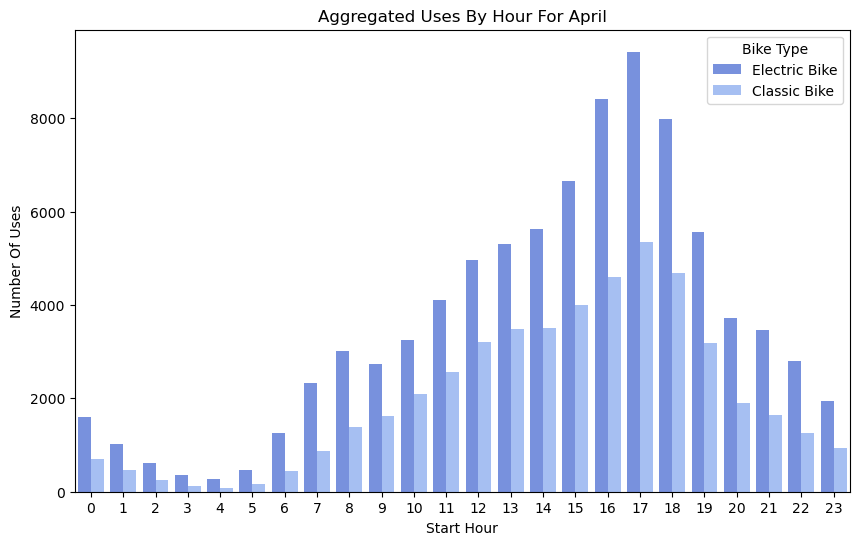

In [62]:
plt.figure(figsize=(10,6))
sns.countplot(data = april.replace(ridetype), x = 'start_hour', hue = 'rideable_type')
plt.xlabel('Start Hour'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated uses by hour for april'.title())
plt.show()

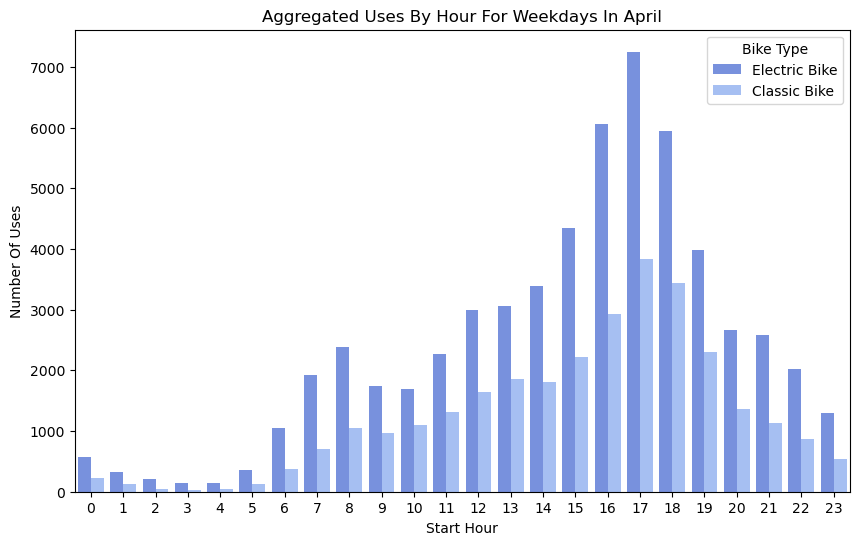

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(data = april[(april['day_of_week'] == 'Thursday') | (april['day_of_week'] == 'Friday') |
                           (april['day_of_week'] == 'Monday') | (april['day_of_week'] == 'Tuesday') |
                        (april['day_of_week'] == 'Wednesday')].replace(ridetype), 
              x = 'start_hour', hue = 'rideable_type')
plt.xlabel('Start Hour'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated uses by hour for weekdays in april'.title())
plt.show()

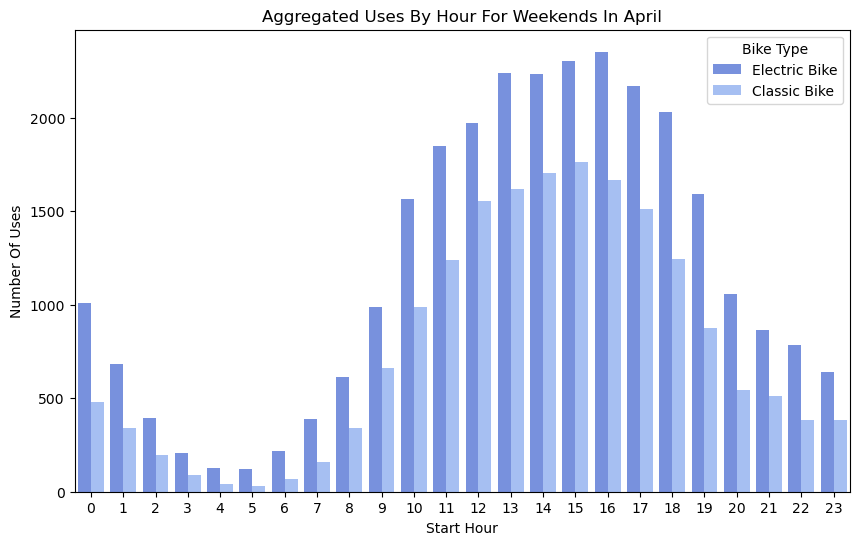

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(data = april[(april['day_of_week'] == 'Sunday') | (april['day_of_week'] == 'Saturday')].replace(ridetype), 
              x = 'start_hour', hue = 'rideable_type')
plt.xlabel('Start Hour'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated uses by hour for weekends in april'.title())
plt.show()

____
<div id="may"></div>


## Casual Uses for May

[Back to Monthly Breakdowns](#monthbreakdown)



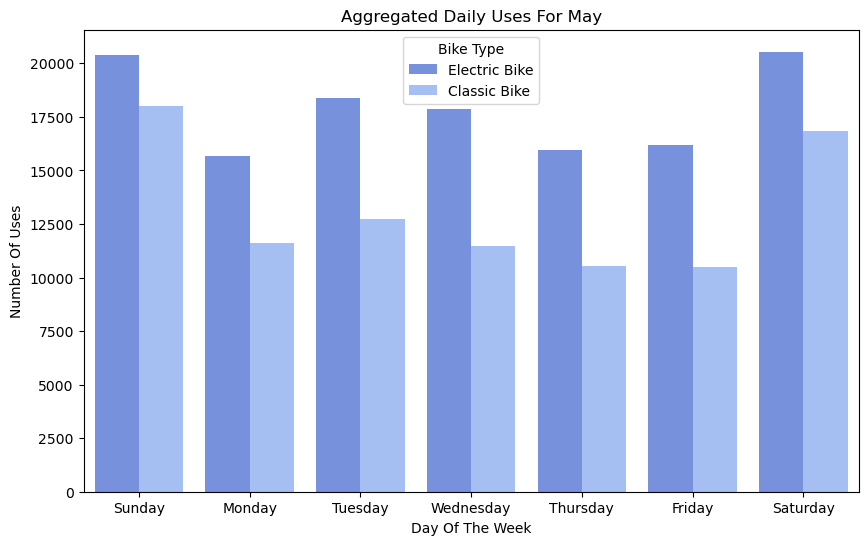

In [65]:
plt.figure(figsize=(10,6))
sns.countplot(data = may.replace(ridetype), x = 'day_of_week', hue = 'rideable_type')
plt.xlabel('day of the week'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated daily uses for may'.title())
plt.show()

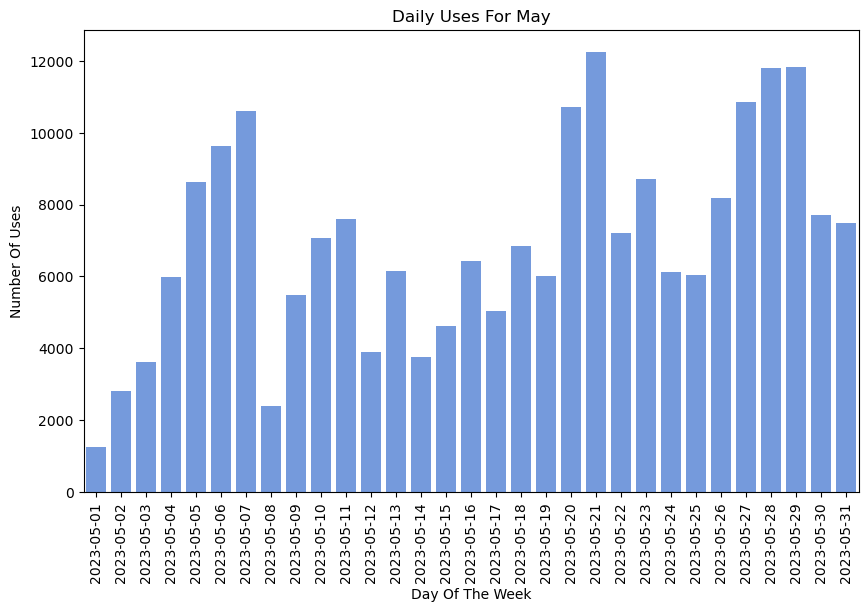

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(data = may.sort_values('start_date') , x = 'start_date', color = 'cornflowerblue')
plt.xlabel('day of the week'.title())
plt.xticks(rotation = 90)
plt.ylabel('Number of uses'.title())
plt.title('daily uses for may'.title())
plt.show()

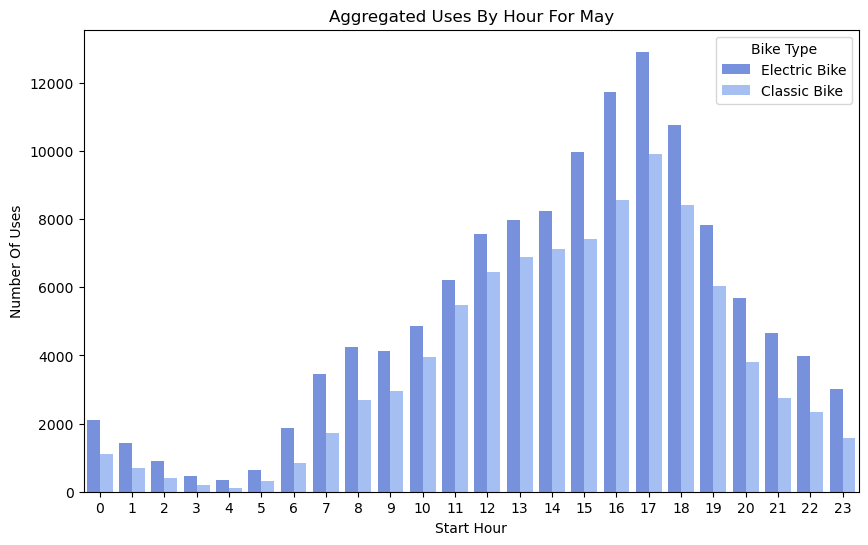

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(data = may.replace(ridetype), x = 'start_hour', hue = 'rideable_type')
plt.xlabel('Start Hour'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated uses by hour for may'.title())
plt.show()

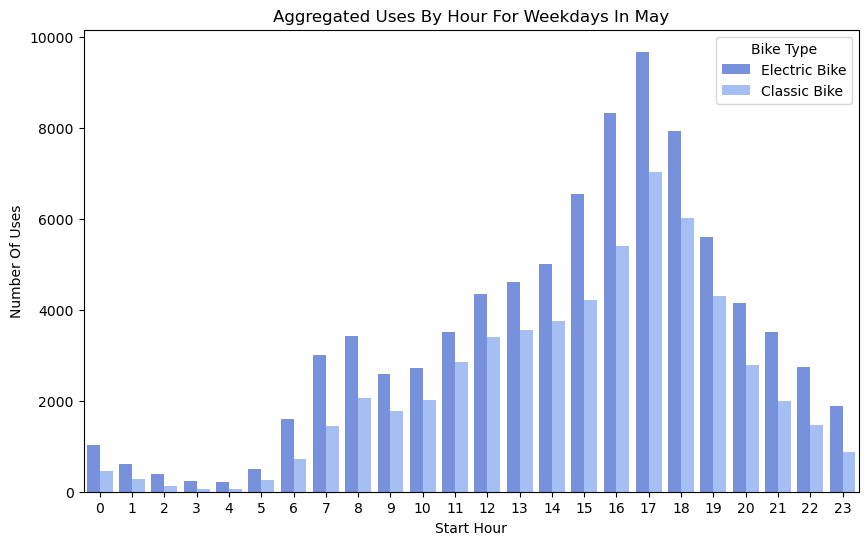

In [68]:
plt.figure(figsize=(10,6))
sns.countplot(data = may[(may['day_of_week'] == 'Thursday') | (may['day_of_week'] == 'Friday') |
                          (may['day_of_week'] == 'Monday') | (may['day_of_week'] == 'Tuesday') |
                        (may['day_of_week'] == 'Wednesday') ].replace(ridetype), 
              x = 'start_hour', hue = 'rideable_type')
plt.xlabel('Start Hour'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated uses by hour for weekdays in may'.title())
plt.show()

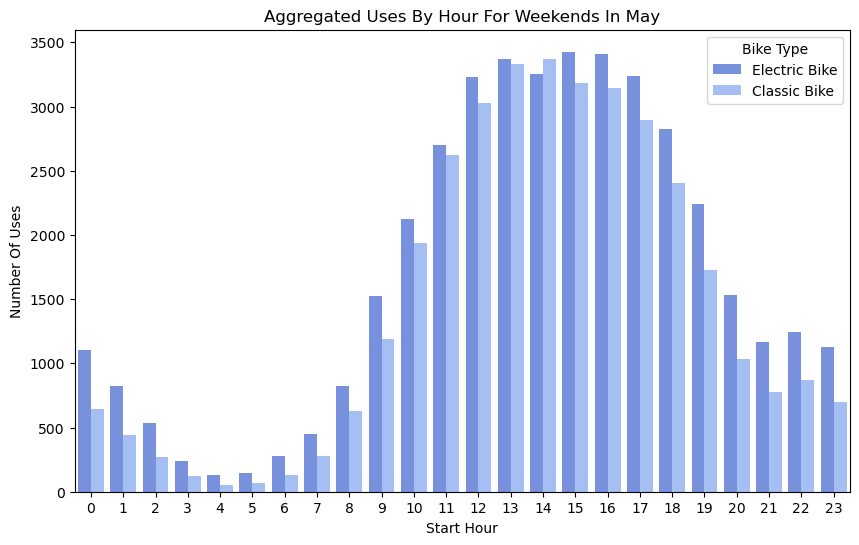

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(data = may[(may['day_of_week'] == 'Sunday') | (may['day_of_week'] == 'Saturday')].replace(ridetype), 
              x = 'start_hour', hue = 'rideable_type')
plt.xlabel('Start Hour'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated uses by hour for weekends in may'.title())
plt.show()

____
<div id="june"></div>

## Casual Uses for June

[Back to Monthly Breakdowns](#monthbreakdown)

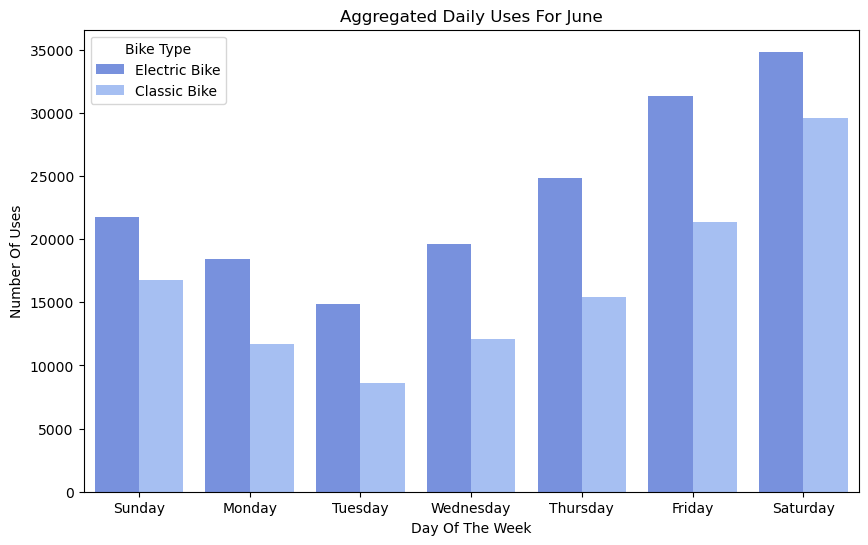

In [70]:
plt.figure(figsize=(10,6))
sns.countplot(data = june.replace(ridetype), x = 'day_of_week', hue = 'rideable_type')
plt.xlabel('day of the week'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated daily uses for june'.title())
plt.show()

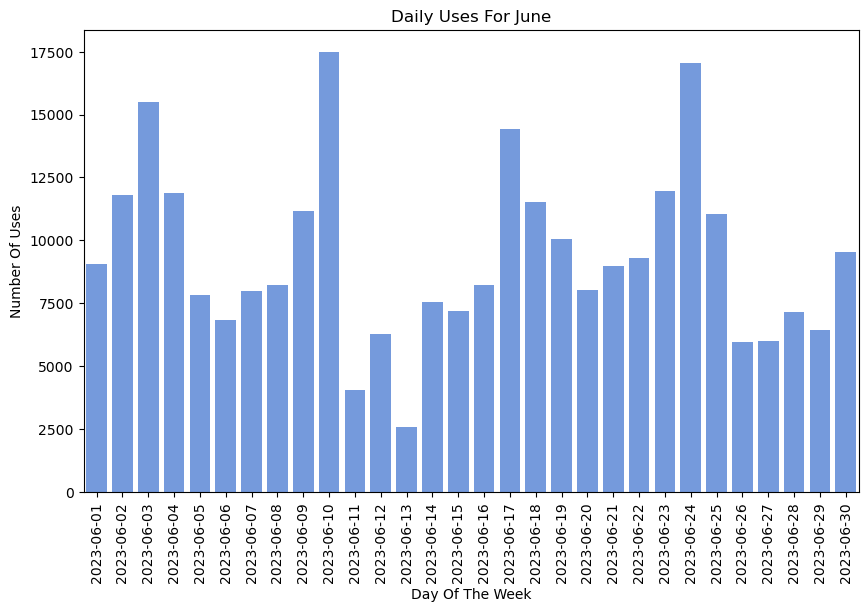

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(data = june.sort_values('start_date') , x = 'start_date', color = 'cornflowerblue')
plt.xlabel('day of the week'.title())
plt.xticks(rotation = 90)
plt.ylabel('Number of uses'.title())
plt.title('daily uses for june'.title())
plt.show()

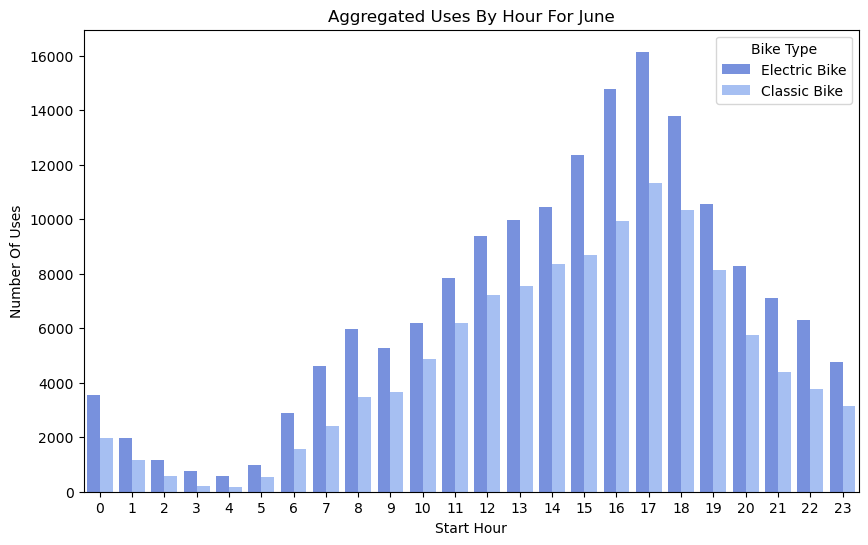

In [72]:
plt.figure(figsize=(10,6))
sns.countplot(data = june.replace(ridetype), x = 'start_hour', hue = 'rideable_type')
plt.xlabel('Start Hour'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated uses by hour for june'.title())
plt.show()

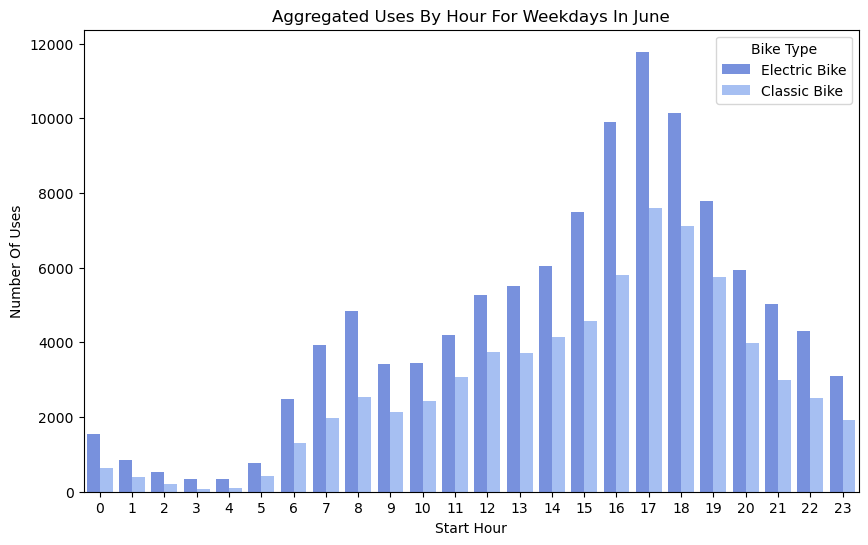

In [73]:
plt.figure(figsize=(10,6))
sns.countplot(data = june[(june['day_of_week'] == 'Thursday') | (june['day_of_week'] == 'Friday') |
                          (june['day_of_week'] == 'Monday') | (june['day_of_week'] == 'Tuesday') |
                        (june['day_of_week'] == 'Wednesday') ].replace(ridetype), 
              x = 'start_hour', hue = 'rideable_type')
plt.xlabel('Start Hour'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated uses by hour for weekdays in june'.title())
plt.show()

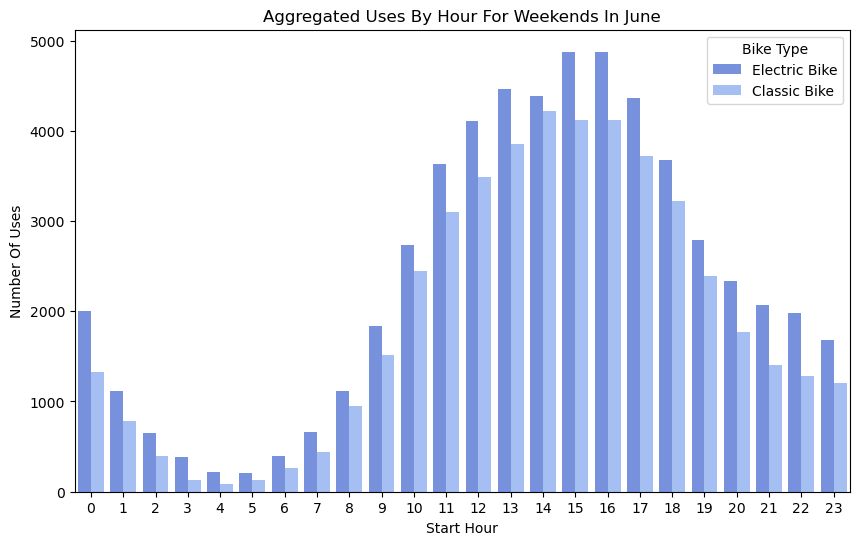

In [74]:
plt.figure(figsize=(10,6))
sns.countplot(data = june[(june['day_of_week'] == 'Sunday') | (june['day_of_week'] == 'Saturday')].replace(ridetype), 
              x = 'start_hour', hue = 'rideable_type')
plt.xlabel('Start Hour'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated uses by hour for weekends in june'.title())
plt.show()

____
<div id="july"></div>

## Casual Uses for July

[Back to Monthly Breakdowns](#monthbreakdown)

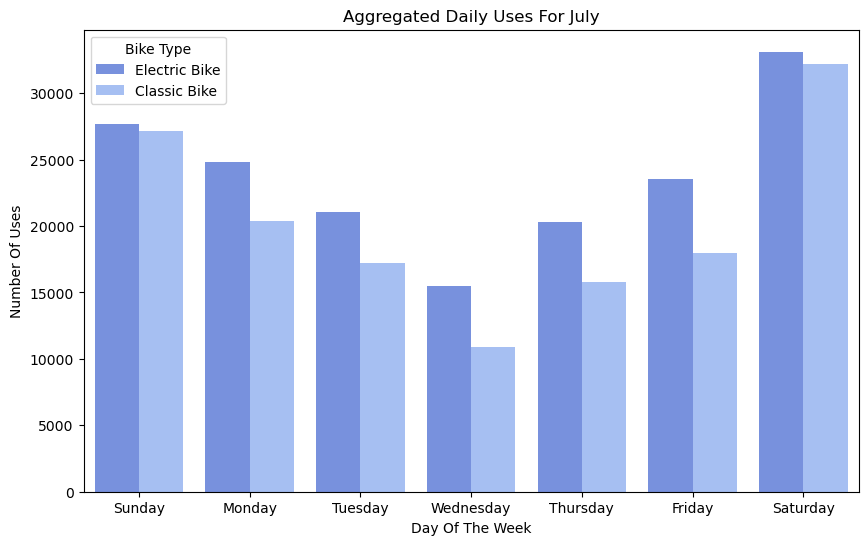

In [75]:
plt.figure(figsize=(10,6))
sns.countplot(data = july.replace(ridetype), x = 'day_of_week', hue = 'rideable_type')
plt.xlabel('day of the week'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated daily uses for july'.title())
plt.show()

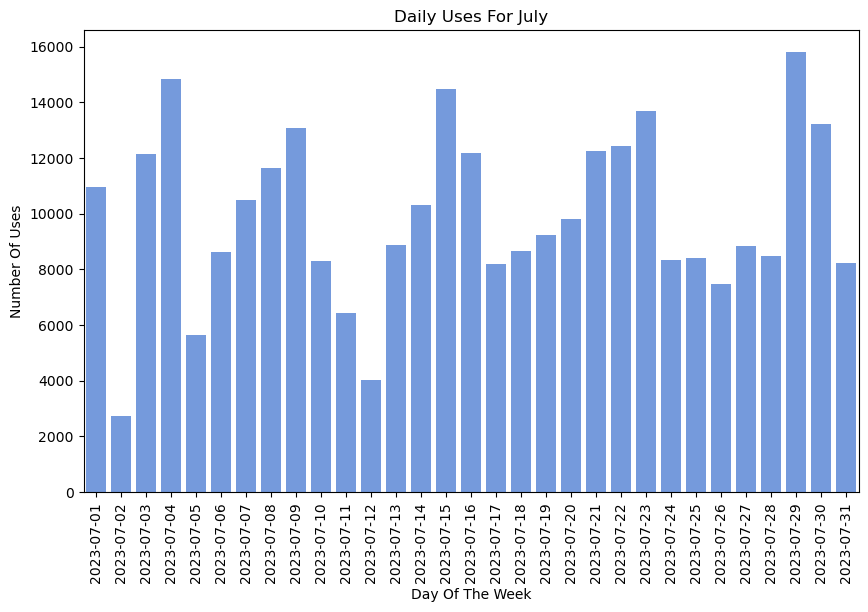

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(data = july.sort_values('start_date') , x = 'start_date', color = 'cornflowerblue')
plt.xlabel('day of the week'.title())
plt.xticks(rotation = 90)
plt.ylabel('Number of uses'.title())
plt.title('daily uses for july'.title())
plt.show()

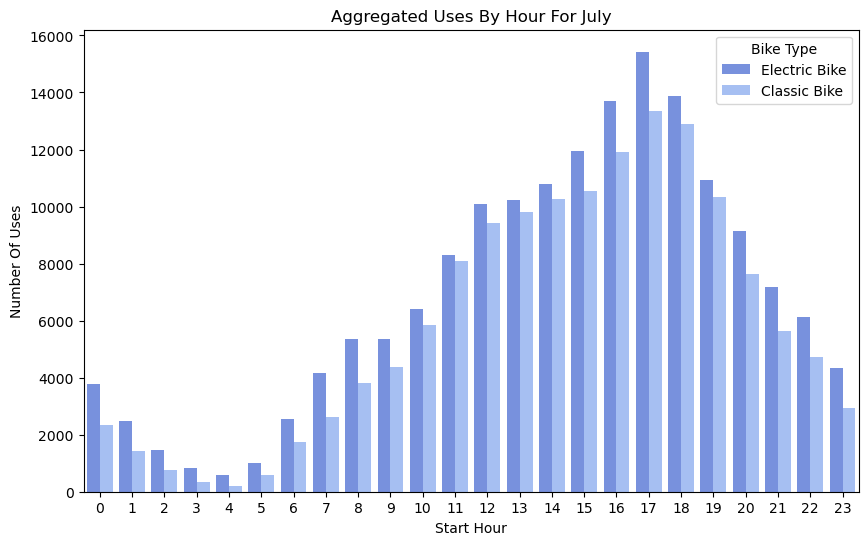

In [77]:
plt.figure(figsize=(10,6))
sns.countplot(data = july.replace(ridetype), x = 'start_hour', hue = 'rideable_type')
plt.xlabel('Start Hour'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated uses by hour for july'.title())
plt.show()

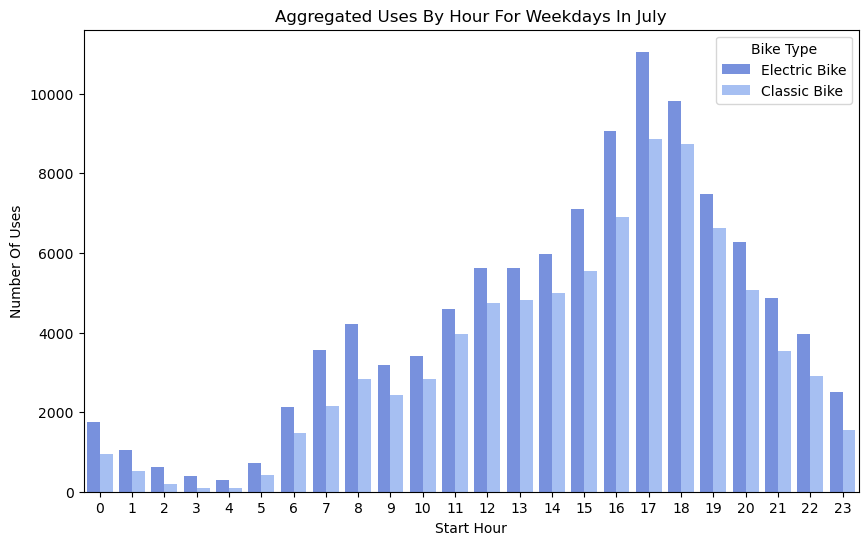

In [78]:
plt.figure(figsize=(10,6))
sns.countplot(data = july[(july['day_of_week'] == 'Thursday') | (july['day_of_week'] == 'Friday') |
                          (july['day_of_week'] == 'Monday') | (july['day_of_week'] == 'Tuesday') |
                        (july['day_of_week'] == 'Wednesday') ].replace(ridetype), 
              x = 'start_hour', hue = 'rideable_type')
plt.xlabel('Start Hour'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated uses by hour for weekdays in july'.title())
plt.show()

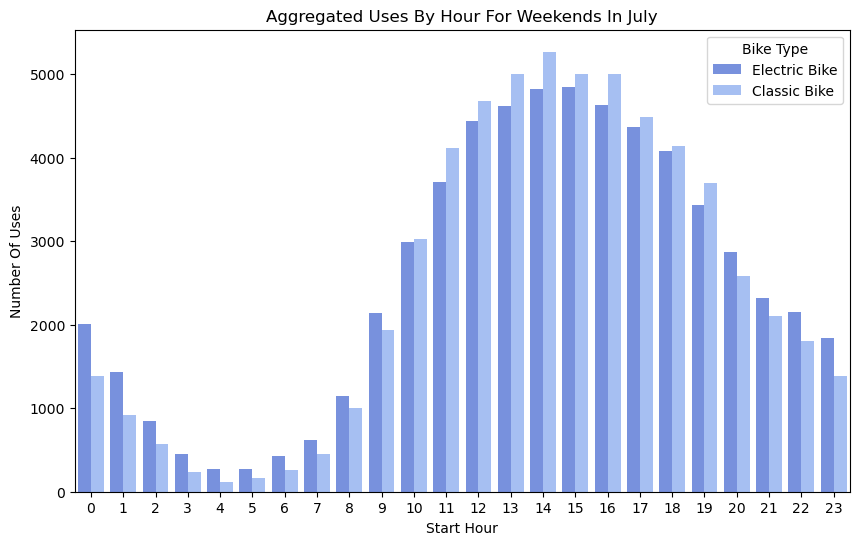

In [79]:
plt.figure(figsize=(10,6))
sns.countplot(data = july[(july['day_of_week'] == 'Sunday') | (july['day_of_week'] == 'Saturday')].replace(ridetype), 
              x = 'start_hour', hue = 'rideable_type')
plt.xlabel('Start Hour'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated uses by hour for weekends in july'.title())
plt.show()

____
<div id="august"></div>

## Casual Uses for August

[Back to Monthly Breakdowns](#monthbreakdown)

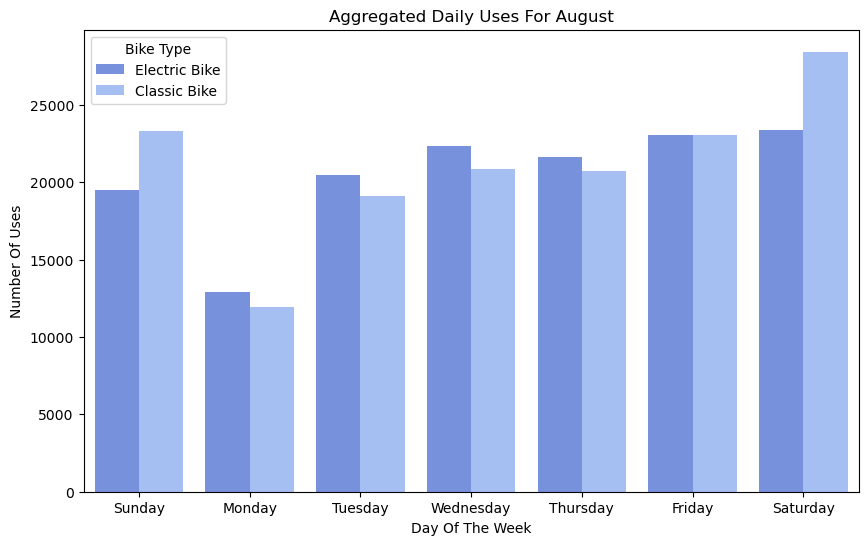

In [85]:
plt.figure(figsize=(10,6))
sns.countplot(data = august.replace(ridetype), x = 'day_of_week', hue = 'rideable_type')
plt.xlabel('day of the week'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated daily uses for August'.title())
plt.show()

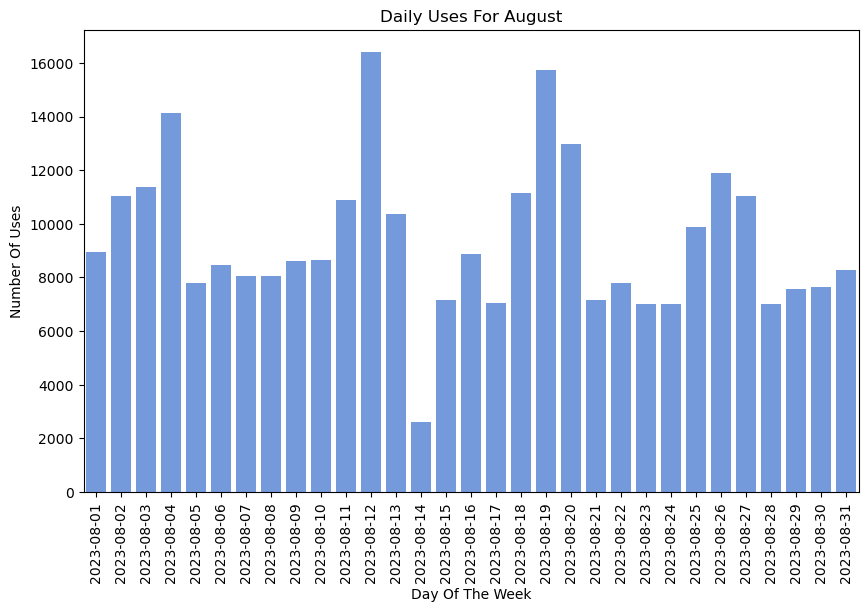

In [81]:
plt.figure(figsize=(10,6))
sns.countplot(data = august.sort_values('start_date') , x = 'start_date', color = 'cornflowerblue')
plt.xlabel('day of the week'.title())
plt.xticks(rotation = 90)
plt.ylabel('Number of uses'.title())
plt.title('daily uses for august'.title())
plt.show()

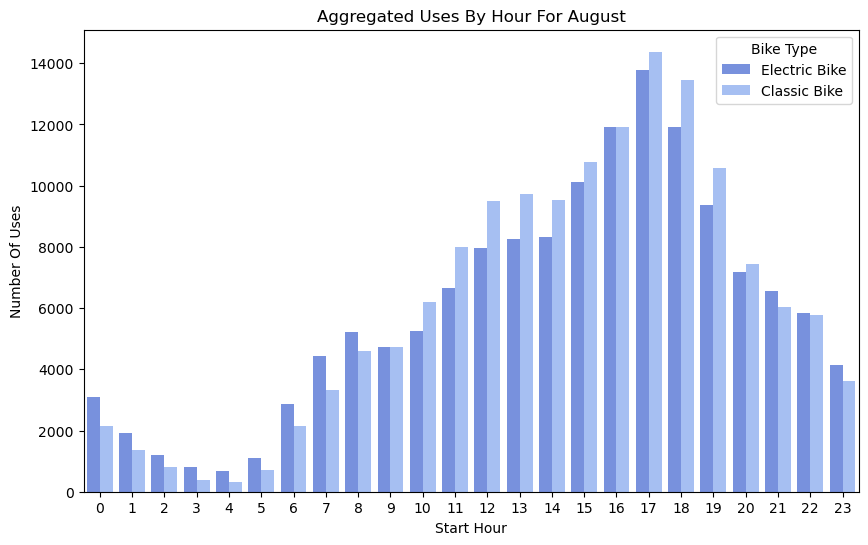

In [82]:
plt.figure(figsize=(10,6))
sns.countplot(data = august.replace(ridetype), x = 'start_hour', hue = 'rideable_type')
plt.xlabel('Start Hour'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated uses by hour for august'.title())
plt.show()

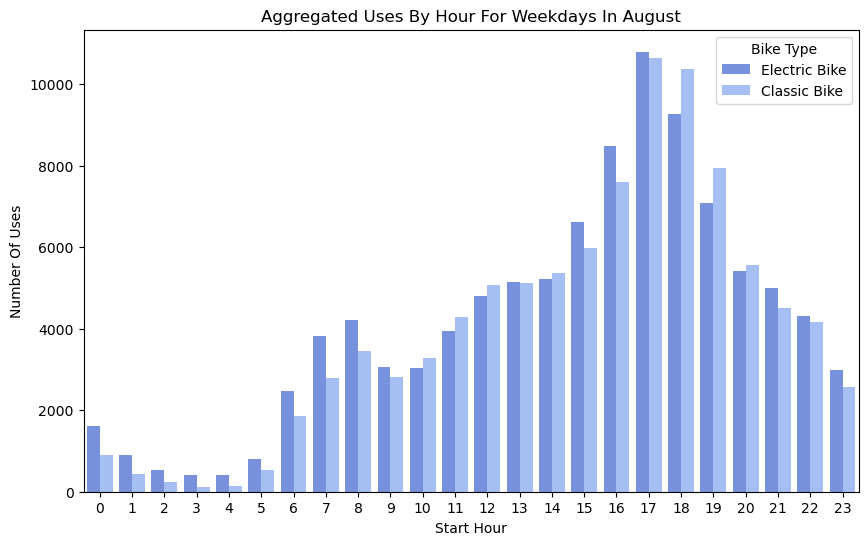

In [83]:
plt.figure(figsize=(10,6))
sns.countplot(data = august[(august['day_of_week'] == 'Thursday') | (august['day_of_week'] == 'Friday') |
                          (august['day_of_week'] == 'Monday') | (august['day_of_week'] == 'Tuesday') |
                        (august['day_of_week'] == 'Wednesday') ].replace(ridetype), 
              x = 'start_hour', hue = 'rideable_type')
plt.xlabel('Start Hour'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated uses by hour for weekdays in august'.title())
plt.show()

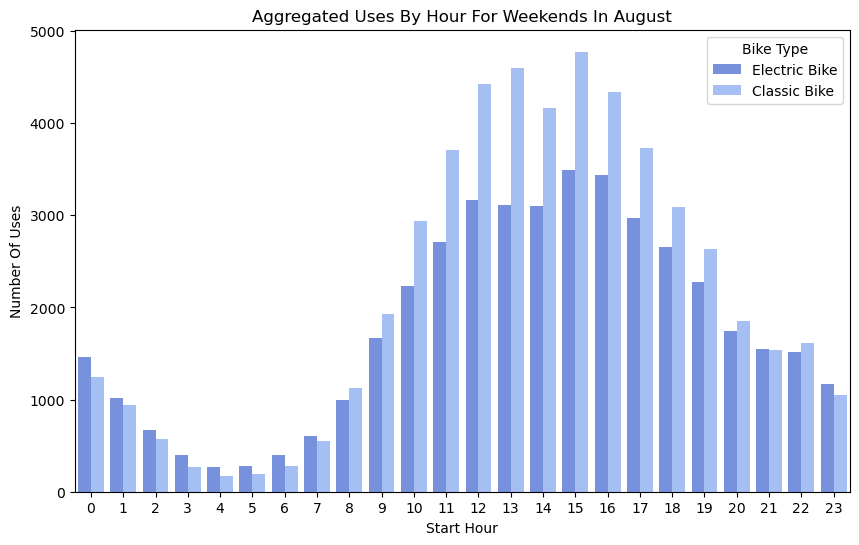

In [84]:
plt.figure(figsize=(10,6))
sns.countplot(data = august[(august['day_of_week'] == 'Sunday') | (august['day_of_week'] == 'Saturday')].replace(ridetype), 
              x = 'start_hour', hue = 'rideable_type')
plt.xlabel('Start Hour'.title())
plt.ylabel('Number of uses'.title())
plt.legend(title = 'Bike Type')
plt.title('aggregated uses by hour for weekends in august'.title())
plt.show()

# Summary of the Monthly Data

The most popular days are going to differ by the month. For aggregated uses by hour on the weekdays there is a clear trend of the bike being the most popular at the end of the work day, 4pm to 6pm, but there is also a big increase in the mornings, starting at 6 am and spiking at 8am. On the weekends there is low use in the early morning with an increase in usage until the peak in the afternoon, the peak hours change slightly every month

____
<div id='share'></div>

# Recommendations

In order to help marketing strategy to increase the amount to casual users to member conversion i recommend that the the strategy do the following:



- Since members do not use the docked bikes and casual users that use them are a very small portion of the user base the marketing strategy should ignore casual users who only use the docked bikes.


- In general both members and casual users prefer electric bikes over the classic bikes. In August and September casual users use the classic bike a little more than electric.


- Cyclistic’s services are used the most in the warmer weather, the strategy should keep in mind that the summer months are the most popular and in the spring the uses increases the closer to summer you get.


- When looking at hourly use the peak hours are different when looking at weekdays and weekends. On the weekdays the most popular hours are 4pm to 6pm and on the weekends the most popular hours are 12pm to 5pm. The marketing strategy should focus on the peak hours so they get the most 


[Top of Page](#top)